# Customer Churn Prediction

## About the Dataset

This project involves predicting customer churn for a subscription-based service using a classification model. The dataset is split into training and testing files, each containing the following features:

- **CustomerID**: Unique identifier for each customer
- **Age**: Age of the customer
- **Gender**: Gender of the customer (Male/Female)
- **Tenure**: Duration (in months) the customer has been with the service
- **Usage Frequency**: Average number of times the customer uses the service in a given period
- **Support Calls**: Number of support calls made by the customer
- **Payment Delay**: Number of days the customer’s payment is delayed
- **Subscription Type**: Category of the subscription (e.g., Basic, Standard, Premium)
- **Contract Length**: Contract duration (e.g., Monthly, Quarterly, Annual)
- **Total Spend**: Total amount spent by the customer
- **Last Interaction**: Number of days since the customer last interacted with the service
- **Churn**: Target variable (1 if the customer churned, 0 otherwise)

## Objective

To develop a machine learning classification model that accurately predicts whether a customer will churn.
The final goal is to identify customers who are likely to churn, allowing the business to take proactive retention actions.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

In [2]:
train_df = pd.read_csv('customer_churn_dataset-training-master.csv')
test_df = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [3]:
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [7]:
train_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [8]:
train_df.describe(include='object')

,Gender,Subscription Type,Contract Length
count,440832,440832,440832
unique,2,3,3
top,Male,Standard,Annual
freq,250252,149128,177198


In [9]:
test_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [10]:
test_df.describe(include='object')

,Gender,Subscription Type,Contract Length
count,64374,64374,64374
unique,2,3,3
top,Female,Standard,Monthly
freq,34353,21502,22130


## Data Preprocessing

### 1. Remove **Unuseful** Features

In [11]:
# Drop CustomerID
train_df.drop(columns='CustomerID', inplace=True)
test_df.drop(columns='CustomerID', inplace=True)

### 2. Check **Duplicates**

In [12]:
train_df.duplicated().sum()

0

In [13]:
test_df.duplicated().sum()

0

### 3. Check **Missing Values**

In [14]:
train_df.isna().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [15]:
train_df[train_df.isna().any(axis=1)]
# train_df[train_df.isna().all()]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
test_df.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

#### Since **Nulls is very small** so will **Remove them**

In [17]:
train_df.dropna(inplace=True)

### 4. Check **Outliers**

In [18]:
numeric_cols = train_df.select_dtypes('number').columns
numeric_cols

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [19]:
categories_cols = train_df.select_dtypes('object').columns
categories_cols

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

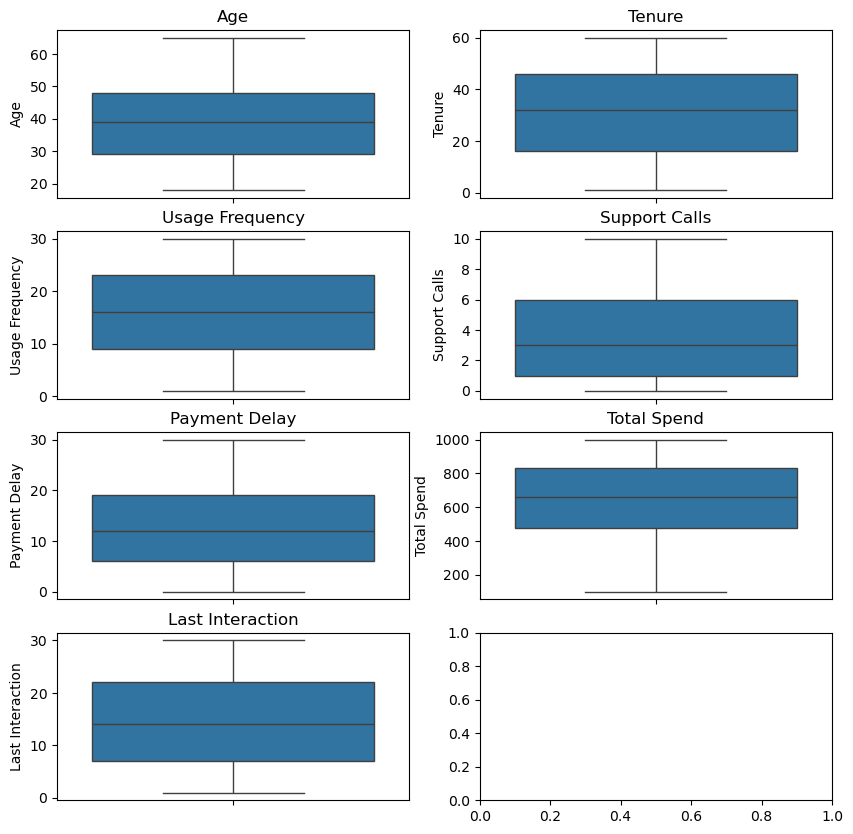

In [20]:
rows_n = 4
fig, axes = plt.subplots(nrows=rows_n, ncols=2 , figsize=(10, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if (col != 'Churn'):  # not useful to chaeck because its binary column
        sns.boxplot(data=train_df, y=col, ax=axes[i])
        axes[i].set_title(col)

#### This fugures show that **There is no Outliers** in training data to be handled

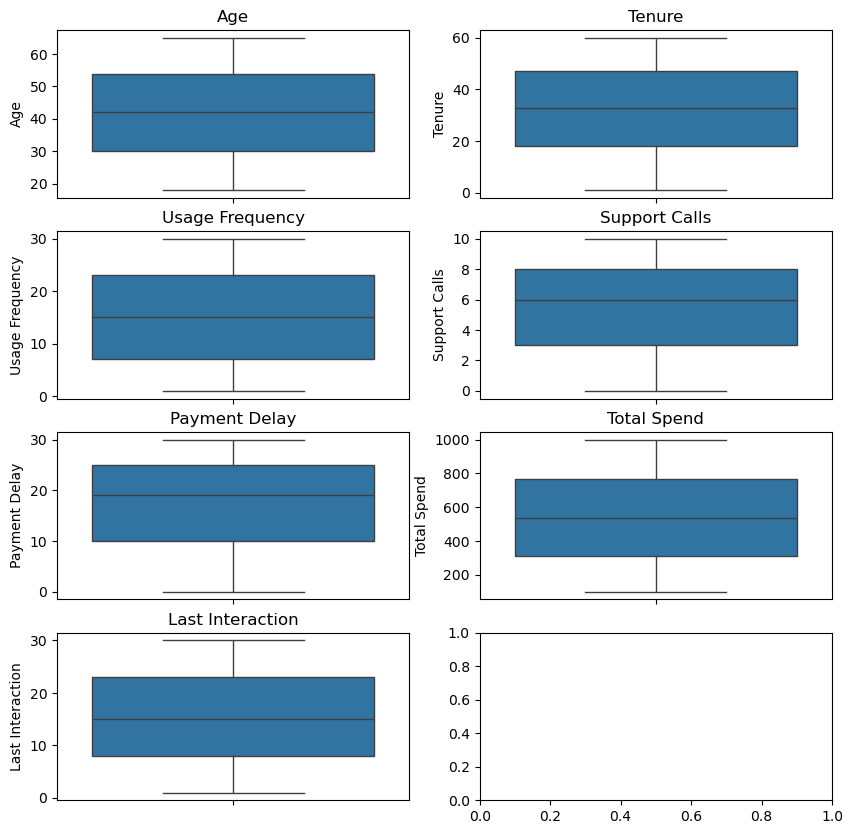

In [21]:
rows_n = 4
fig, axes = plt.subplots(nrows=rows_n, ncols=2 , figsize=(10, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if (col != 'Churn'):  # not useful to chaeck because its binary column
        sns.boxplot(data=test_df, y=col, ax=axes[i])
        axes[i].set_title(col)

#### This figures show that **There is no Outliers** in testing data (Just For check)

## Exploratory Data Analysis (EDA)

In [22]:
# manually adding annotations to each bar
def annotate_bars(ax):
    for p in ax.patches:
        count = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, str(count), ha='center', va='bottom')

### Churn Distribution (Target Variable)

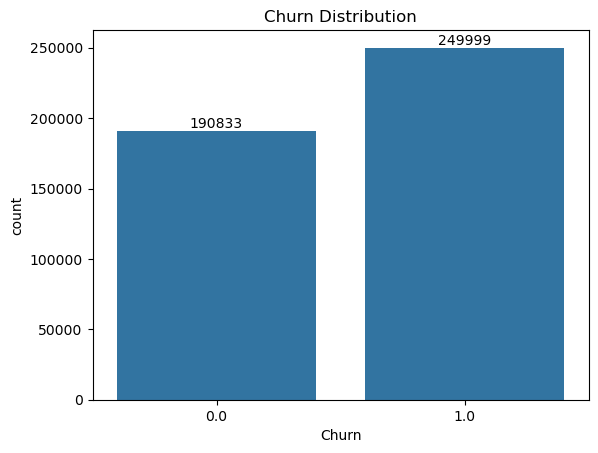

In [23]:
ax = sns.countplot(x='Churn', data=train_df)
plt.title('Churn Distribution')
annotate_bars(ax)

In [24]:
train_df['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

#### This figures show that **Cutomers who Churned is greater than who Stayed**

### Numerical Features Distribution

Text(0.5, 0.98, 'Numerical Features Distribution')

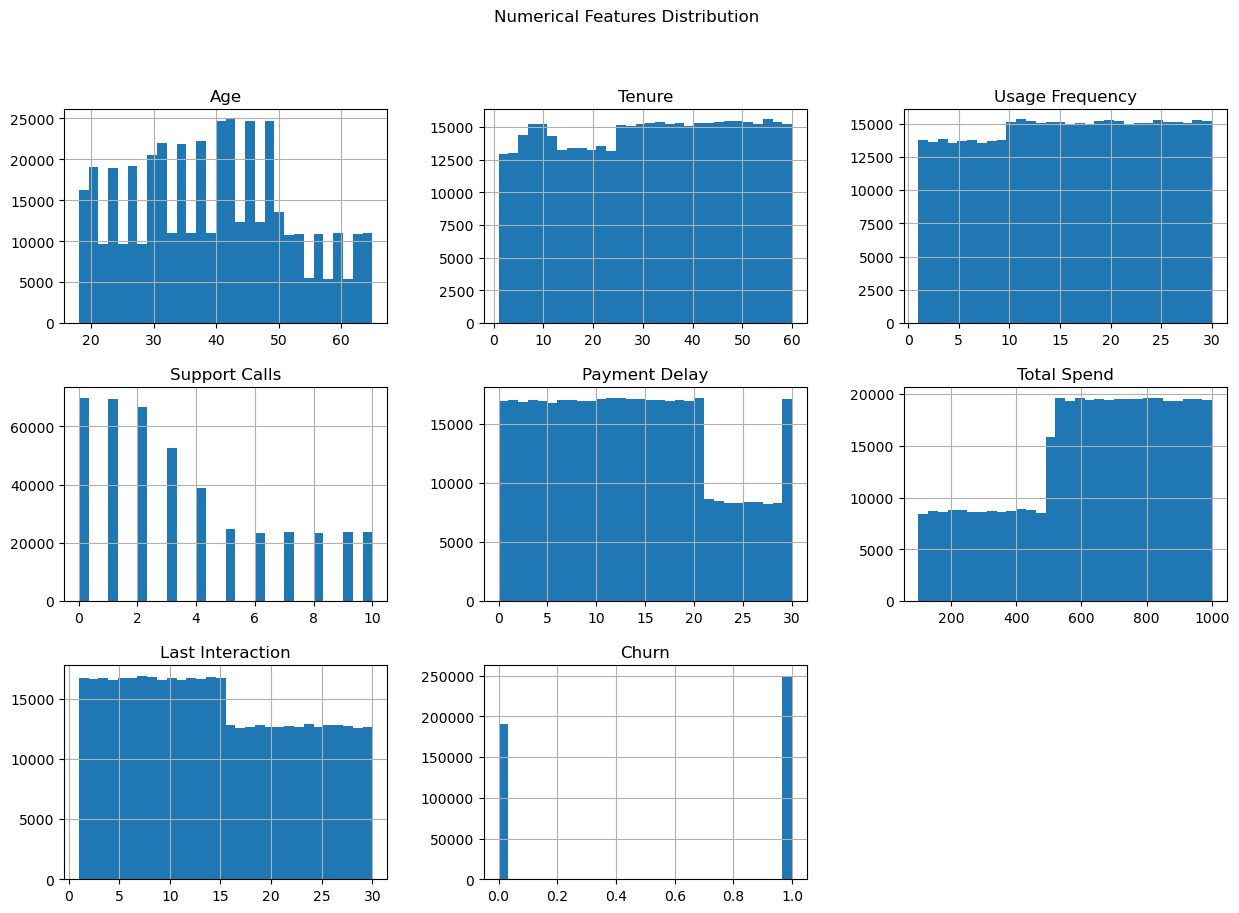

In [25]:
train_df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Numerical Features Distribution')

### Gender Distribution

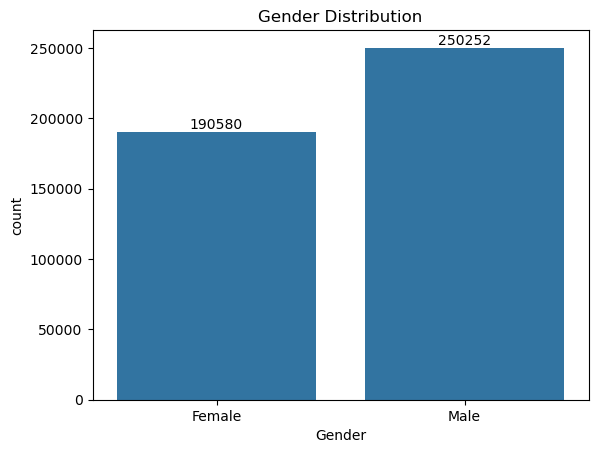

In [26]:
ax = sns.countplot(x='Gender', data=train_df)
plt.title('Gender Distribution')
annotate_bars(ax)

#### This figures show that **Male** Customers is more than Female customers

### Subscription Type Distribution

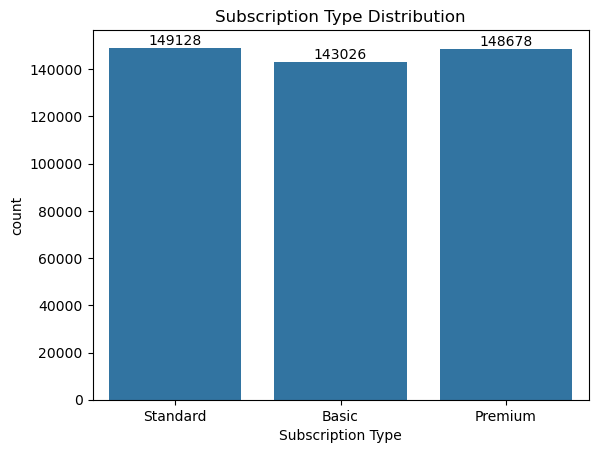

In [27]:
ax = sns.countplot(x='Subscription Type', data=train_df)
plt.title('Subscription Type Distribution')
annotate_bars(ax)

#### This figures show that there is **Balance** between Subscription Types

### Contract Length Distribution

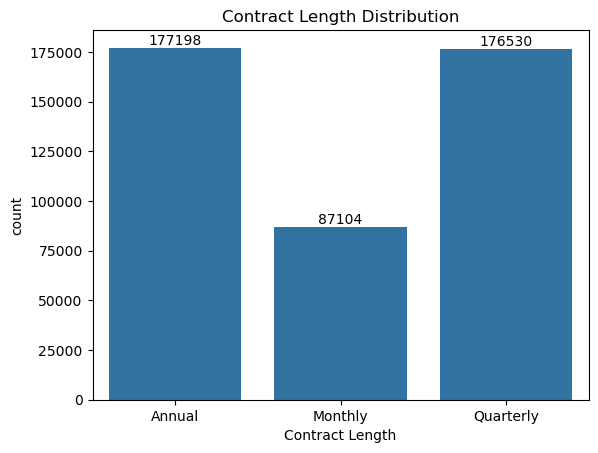

In [28]:
ax = sns.countplot(x='Contract Length', data=train_df)
plt.title('Contract Length Distribution')
annotate_bars(ax)

#### This figures show that **Most** of Contract are **Anual or Quarterly**

### Gender vs. Churn

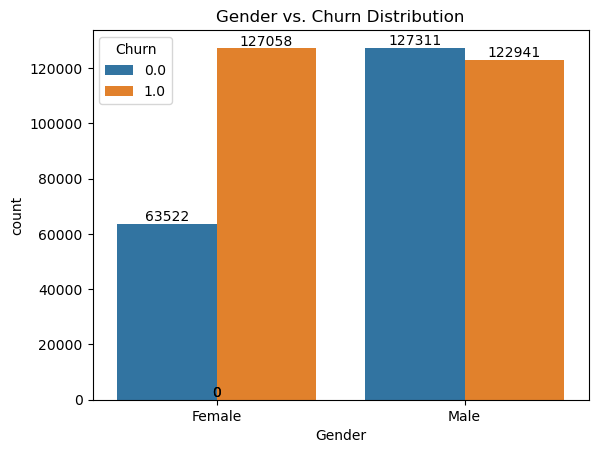

In [29]:
ax = sns.countplot(x='Gender', data=train_df, hue='Churn')
plt.title('Gender vs. Churn Distribution')
annotate_bars(ax)

#### This figures show that **Most of Female** is more likely to **Churned**

### Subscription Type vs. Churn

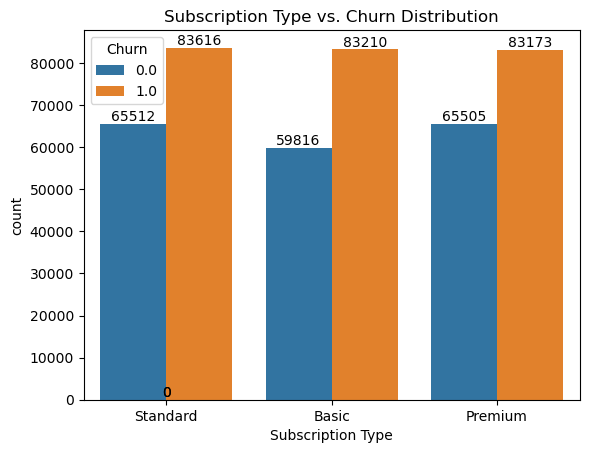

In [30]:
ax = sns.countplot(x='Subscription Type', data=train_df, hue='Churn')
plt.title('Subscription Type vs. Churn Distribution')
annotate_bars(ax)

#### This figures also show that there is **Balence** for churned between all Subscription Types

### Contract Length vs. Churn

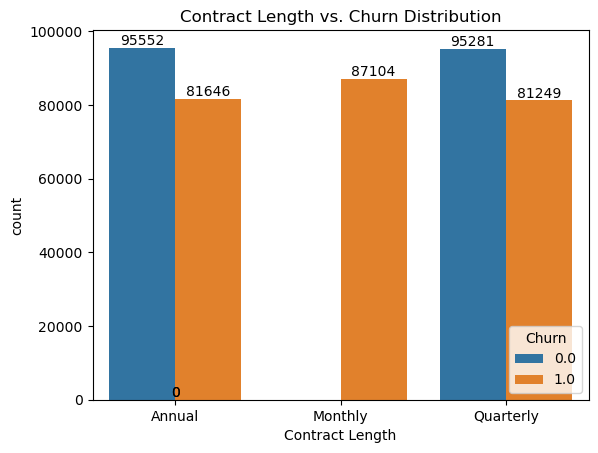

In [31]:
ax = sns.countplot(x='Contract Length', data=train_df, hue='Churn')
plt.title('Contract Length vs. Churn Distribution')
annotate_bars(ax)

#### This figures show that **All** of Customers who have **Monthly Contract** they **Churned**

### Age vs. Churn

Text(0.5, 1.0, 'Age by Churn')

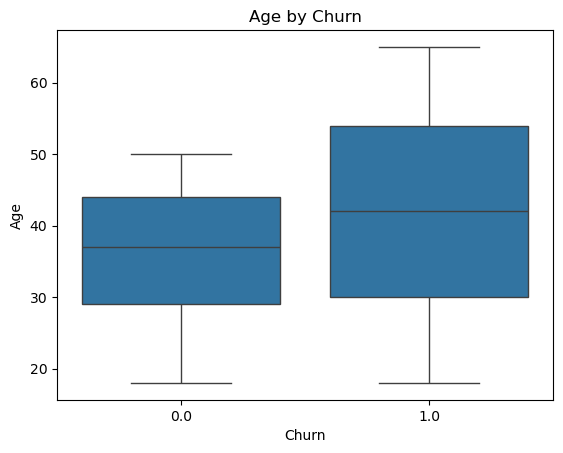

In [32]:
sns.boxplot(x='Churn', y='Age', data=train_df)
plt.title('Age by Churn')

#### This figures show that Customer whose Age is **Greater than 50** they **Churned**

### Tenure vs. Churn

Text(0.5, 1.0, 'Tenure by Churn')

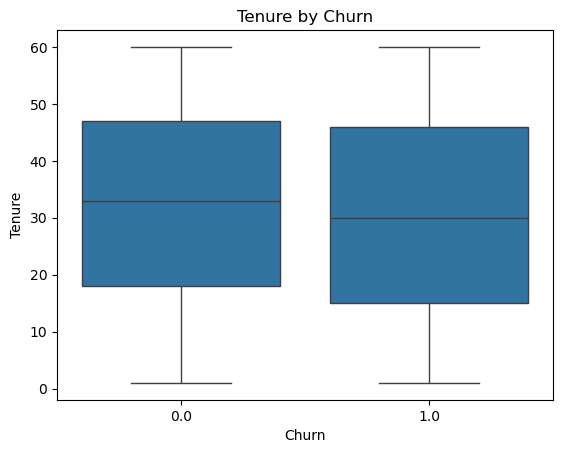

In [33]:
sns.boxplot(x='Churn', y='Tenure', data=train_df)
plt.title('Tenure by Churn')

#### This figures show that there is **Balance** betweeen Tenure range in Churned

### Usage Frequency vs. Churn

Text(0.5, 1.0, 'Usage Frequency by Churn')

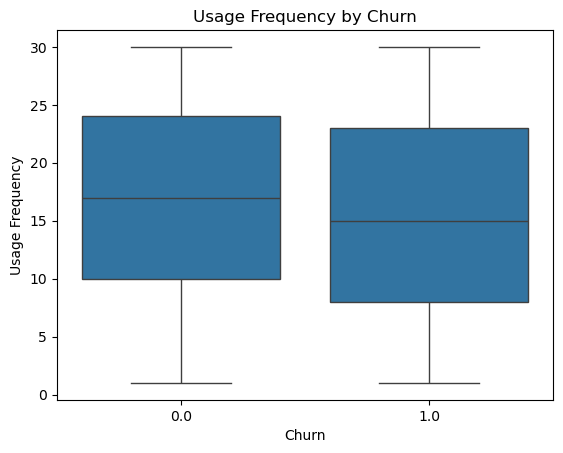

In [34]:
sns.boxplot(x='Churn', y='Usage Frequency', data=train_df)
plt.title('Usage Frequency by Churn')

#### This figures show that there is **Balance** betweeen Usage Frequency range in Churned

### Support Calls vs. Churn

Text(0.5, 1.0, 'Support Calls by Churn')

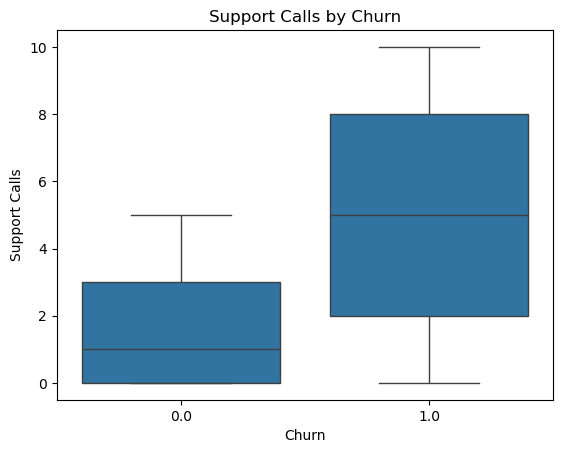

In [35]:
sns.boxplot(x='Churn', y='Support Calls', data=train_df)
plt.title('Support Calls by Churn')

#### This figures show that Customer who have Suppot Calls is **Greater than 5** they **Churned**

### Payment Delay vs. Churn

Text(0.5, 1.0, 'Payment Delay by Churn')

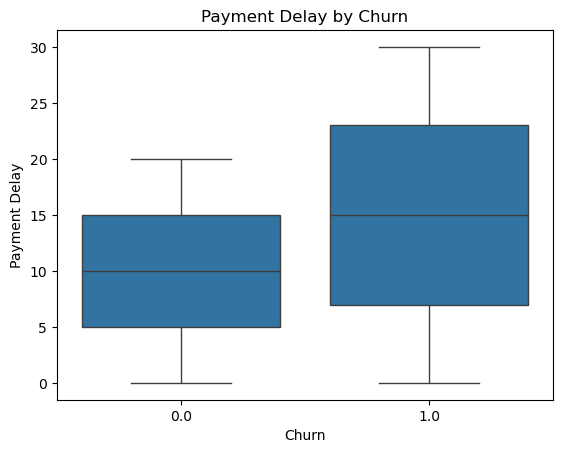

In [36]:
sns.boxplot(x='Churn', y='Payment Delay', data=train_df)
plt.title('Payment Delay by Churn')

#### This figures show that Customer whose Payment Delay is **Greater than 20** they **Churned**

### Total Spend vs. Churn

Text(0.5, 1.0, 'Total Spend by Churn')

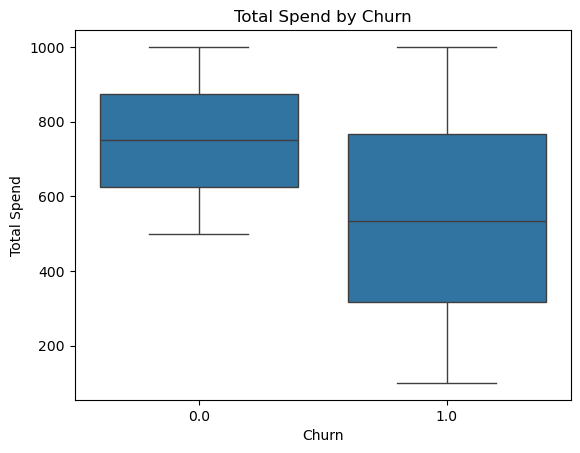

In [37]:
sns.boxplot(x='Churn', y='Total Spend', data=train_df)
plt.title('Total Spend by Churn')

#### This figures show that Customer whose Total Spend is **Less than 500** they **Churned**

### Last Interaction vs. Churn

Text(0.5, 1.0, 'Last Interaction by Churn')

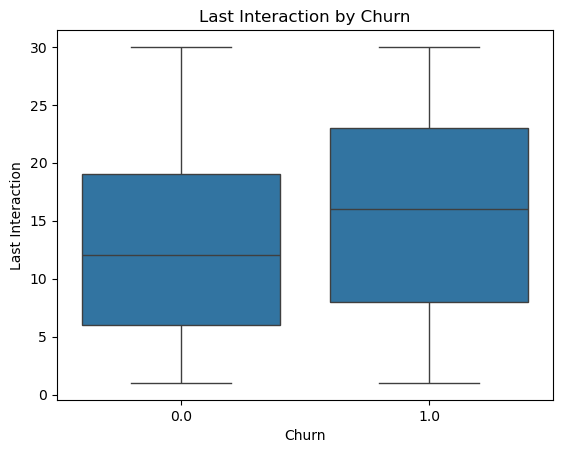

In [38]:
sns.boxplot(x='Churn', y='Last Interaction', data=train_df)
plt.title('Last Interaction by Churn')

#### This figures show that there is **Balance** betweeen Last Interaction range in Churned

### Correlation Matrix

Text(0.5, 1.0, 'Correlation Heatmap')

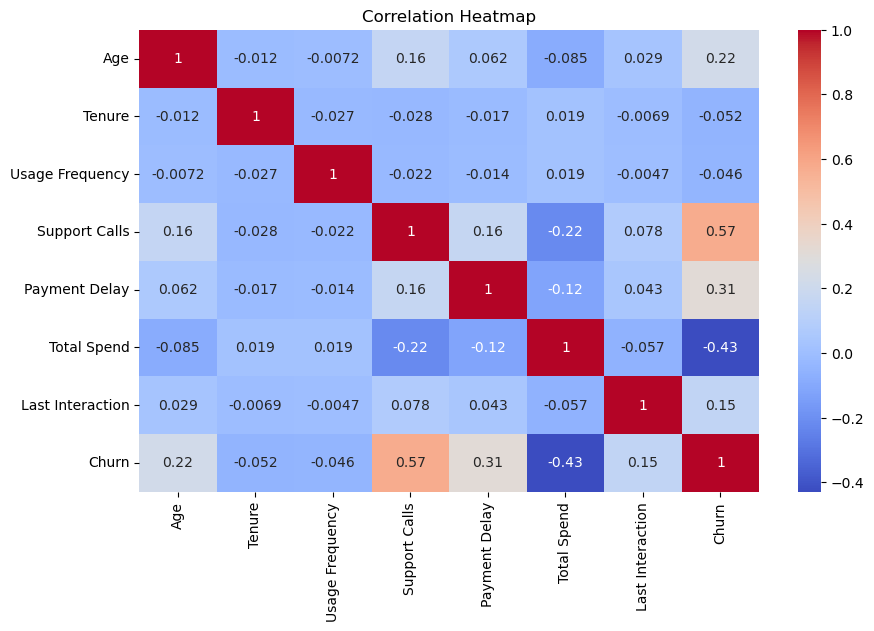

In [39]:
corr = train_df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

## Feature Engineering

### Feature Selection (Correlation)

#### Because correlation between **Tenure & Usage Frequency** an **Target (Churn)**  are **Weak (almost 0.05)** so will **Remove Them** and this is very clear at **EDA** process

In [40]:
train_df.drop(columns=['Tenure','Usage Frequency'], inplace=True)
test_df.drop(columns=['Tenure','Usage Frequency'], inplace=True)

### Feature Selection (Chi-Square)

In [41]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

In [42]:
X_cat = train_df[categories_cols]
y = train_df['Churn']

In [43]:
# Step 1: Encode categorical variables as integers (required for chi2)
X_encoded = X_cat.apply(LabelEncoder().fit_transform)

In [44]:
# Step 2: Apply chi-square test
chi_scores, p_values = chi2(X_encoded, y)

In [45]:
# Step 3: Display results in a DataFrame
chi2_results = pd.DataFrame({
    'Feature': categories_cols,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_results)

             Feature   Chi2 Score       p-value
0             Gender  5862.870662  0.000000e+00
1  Subscription Type    85.033090  2.934134e-20
2    Contract Length     0.003056  9.559140e-01


In [46]:
# X_encoded['Churn'] = train_df['Churn']

# plt.figure(figsize=(10, 6))
# sns.heatmap(X_encoded.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')

#### There is **no relation** between Contract Length & Churn (Turget)

In [47]:
train_df.drop(columns='Contract Length', inplace=True)
test_df.drop(columns='Contract Length', inplace=True)

#### Also because Relation between **Subscription Type** and Churn (Target) is **Weak** can **Remove** this feature

In [48]:
train_df.drop(columns='Subscription Type', inplace=True)
test_df.drop(columns='Subscription Type', inplace=True)

### Encoding

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
categorical_cols = ['Gender']

In [51]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [52]:
# Fit on train only, transform both
encoded_train = pd.DataFrame(
    encoder.fit_transform(train_df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)
encoded_test = pd.DataFrame(
    encoder.transform(test_df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

In [53]:
# Drop original categoricals
train_df.drop(columns=categorical_cols, inplace=True)
test_df.drop(columns=categorical_cols, inplace=True)

In [54]:
# Concatenate encoded columns
train_df = pd.concat([train_df, encoded_train], axis=1)
test_df = pd.concat([test_df, encoded_test], axis=1)

In [55]:
train_df.head()

,Age,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male
0,30.0,5.0,18.0,932.0,17.0,1.0,0.0
1,65.0,10.0,8.0,557.0,6.0,1.0,0.0
2,55.0,6.0,18.0,185.0,3.0,1.0,0.0
3,58.0,7.0,7.0,396.0,29.0,1.0,1.0
4,23.0,5.0,8.0,617.0,20.0,1.0,1.0


In [56]:
train_df.isna().sum()

Age                 1
Support Calls       1
Payment Delay       1
Total Spend         1
Last Interaction    1
Churn               1
Gender_Male         1
dtype: int64

In [57]:
train_df[train_df.isna().any(axis=1)]

,Age,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male
440832,31.0,1.0,14.0,567.77,21.0,0.0,NaN
199295,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [58]:
train_df.dropna(inplace=True)

In [59]:
test_df.isna().sum()

Age                 0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
Gender_Male         0
dtype: int64

### Data Splitting

In [60]:
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']

X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']

In [61]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((440831, 6), (440831,), (64374, 6), (64374,))

### Data Scalling

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Feature Selection (Variance)

In [64]:
from sklearn.feature_selection import VarianceThreshold

In [65]:
# Remove features with variance below a threshold (e.g., 0.01)
selector = VarianceThreshold(threshold=0.01)
selected_columns_train = selector.fit_transform(X_train)
selected_columns_test = selector.transform(X_test)

In [66]:
selected_columns_train.shape, selected_columns_test.shape

((440831, 6), (64374, 6))

#### Will **not Remove** any feature

In [67]:
# # Get the column names that were kept
# selected_columns_train = X_train.columns[selector.get_support()]
# selected_columns_test = X_test.columns[selector.get_support()]

# # Create a new DataFrame with selected columns
# X_train_selected = X_train[selected_columns_train]
# X_test_selected = X_test[selected_columns_test]

### Lasso (L1-Regularized) Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [69]:
# Train L1-regularized logistic regression
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [70]:
# Feature selector
selector = SelectFromModel(model, prefit=True)

# Get mask of selected features
selected_mask = selector.get_support()
selected_mask

array([ True,  True,  True,  True,  True,  True])

#### Will **not Remove** any feature

In [71]:
# # Get selected feature names
# selected_features_train = X_train.columns[selected_mask]
# selected_features_test = X_test.columns[selected_mask]

# # Create new DataFrame with only selected features
# X_train_selected = X_train[selected_features_train]
# X_test_selected = X_test[selected_features_test]
# X_train.shape, X_test.shape

## Modeling (Logistic Regression)

### Training

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

### Evaluation

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [75]:
y_pred = model.predict(X_test)
y_test.head(), y_pred[:5]

(0    1
 1    0
 2    0
 3    0
 4    0
 Name: Churn, dtype: int64,
 array([1., 1., 1., 1., 1.]))

In [76]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.27      0.41     33881
           1       0.54      0.97      0.70     30493

    accuracy                           0.60     64374
   macro avg       0.73      0.62      0.56     64374
weighted avg       0.74      0.60      0.55     64374



## Modelling (SVM)

### Training

In [77]:
from sklearn.svm import LinearSVC

In [78]:
model = LinearSVC(class_weight='balanced')
model.fit(X_train, y_train)

LinearSVC(class_weight='balanced')

### Evaluation

In [79]:
y_pred = model.predict(X_test)
y_test.head(), y_pred[:5]

(0    1
 1    0
 2    0
 3    0
 4    0
 Name: Churn, dtype: int64,
 array([1., 1., 1., 1., 1.]))

In [80]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.27      0.42     33881
           1       0.55      0.97      0.70     30493

    accuracy                           0.60     64374
   macro avg       0.73      0.62      0.56     64374
weighted avg       0.74      0.60      0.55     64374



### SMOTE 

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
# Apply SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [83]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Churn
1.0    249999
0.0    190832
Name: count, dtype: int64
After SMOTE: Churn
1.0    249999
0.0    249999
Name: count, dtype: int64


In [84]:
# Fit model on SMOTE data
model = LinearSVC()
model.fit(X_train_smote, y_train_smote)

LinearSVC()

In [85]:
# Evaluate on validation set
y_pred = model.predict(X_test)
print("Classification Report on Validation Set:")
print(classification_report(y_test, y_pred))

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.92      0.27      0.42     33881
           1       0.55      0.97      0.70     30493

    accuracy                           0.60     64374
   macro avg       0.73      0.62      0.56     64374
weighted avg       0.74      0.60      0.55     64374



### Hyperparameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [87]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],         # Regularization strength
    'loss': ['squared_hinge'],              # 'hinge' is less stable
    'penalty': ['l2'],                      # 'l1' only works with 'liblinear'
    'max_iter': [1000, 5000, 10000],        # Ensure convergence
    'class_weight': [None, 'balanced']
}

In [88]:
svc = LinearSVC(dual=False)  # dual=False is recommended when n_samples > n_features

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # or 'f1_macro' or 'roc_auc'
    verbose=2,
    n_jobs=-1
)

In [89]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LinearSVC(dual=False), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'loss': ['squared_hinge'],
                         'max_iter': [1000, 5000, 10000], 'penalty': ['l2']},
             scoring='f1', verbose=2)

In [90]:
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Params: {'C': 0.001, 'class_weight': None, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2'}
Best Score: 0.8635025571759135


In [91]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report on Validation Set:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5901140211886786
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.24      0.38     33881
           1       0.54      0.98      0.69     30493

    accuracy                           0.59     64374
   macro avg       0.73      0.61      0.54     64374
weighted avg       0.74      0.59      0.53     64374



In [92]:
skip

NameError: name 'skip' is not defined

## Modeling (KNN)

### Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

### Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_test.head(), y_pred[:5]

In [ ]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Modeling (Naive Bayse)

### Training

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

### Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_test.head(), y_pred[:5]

In [ ]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Modeling (Random Forest)

### Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

### Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_test.head(), y_pred[:5]

In [ ]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Modeling (XGBoost)

### Training

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

### Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_test.head(), y_pred[:5]

In [ ]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Modeling (Gradient Boosting)

### Training

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

### Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_test.head(), y_pred[:5]

In [ ]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))